# 1. Import Library

In [1]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# 2. EDA & Data Preprocessing

In [3]:
# Load dataset
df = pd.read_csv('employee_attrition_and_performance.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [4]:
# Size of Dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1470
Number of columns: 35


In [5]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df.columns.duplicated()
cols = list(df.columns)
print(f"Duplicated Column: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df = df.loc[:,~df.columns.duplicated()].copy()

print("After removing...")

dup_cols = df.columns.duplicated()
cols = list(df.columns)
print(f"Duplicated Column: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Column: 
[]
After removing...
Duplicated Column: 
[]


In [6]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [7]:
# List of all columns
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [8]:
# Drop unnecessary columns
df = df.drop(['EmployeeNumber'], axis=1)
df = df.reset_index(drop=True)
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [9]:
# Remove row with missing values
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [10]:
# Drop duplicated rows
print("Number of duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df.shape[0] - df.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


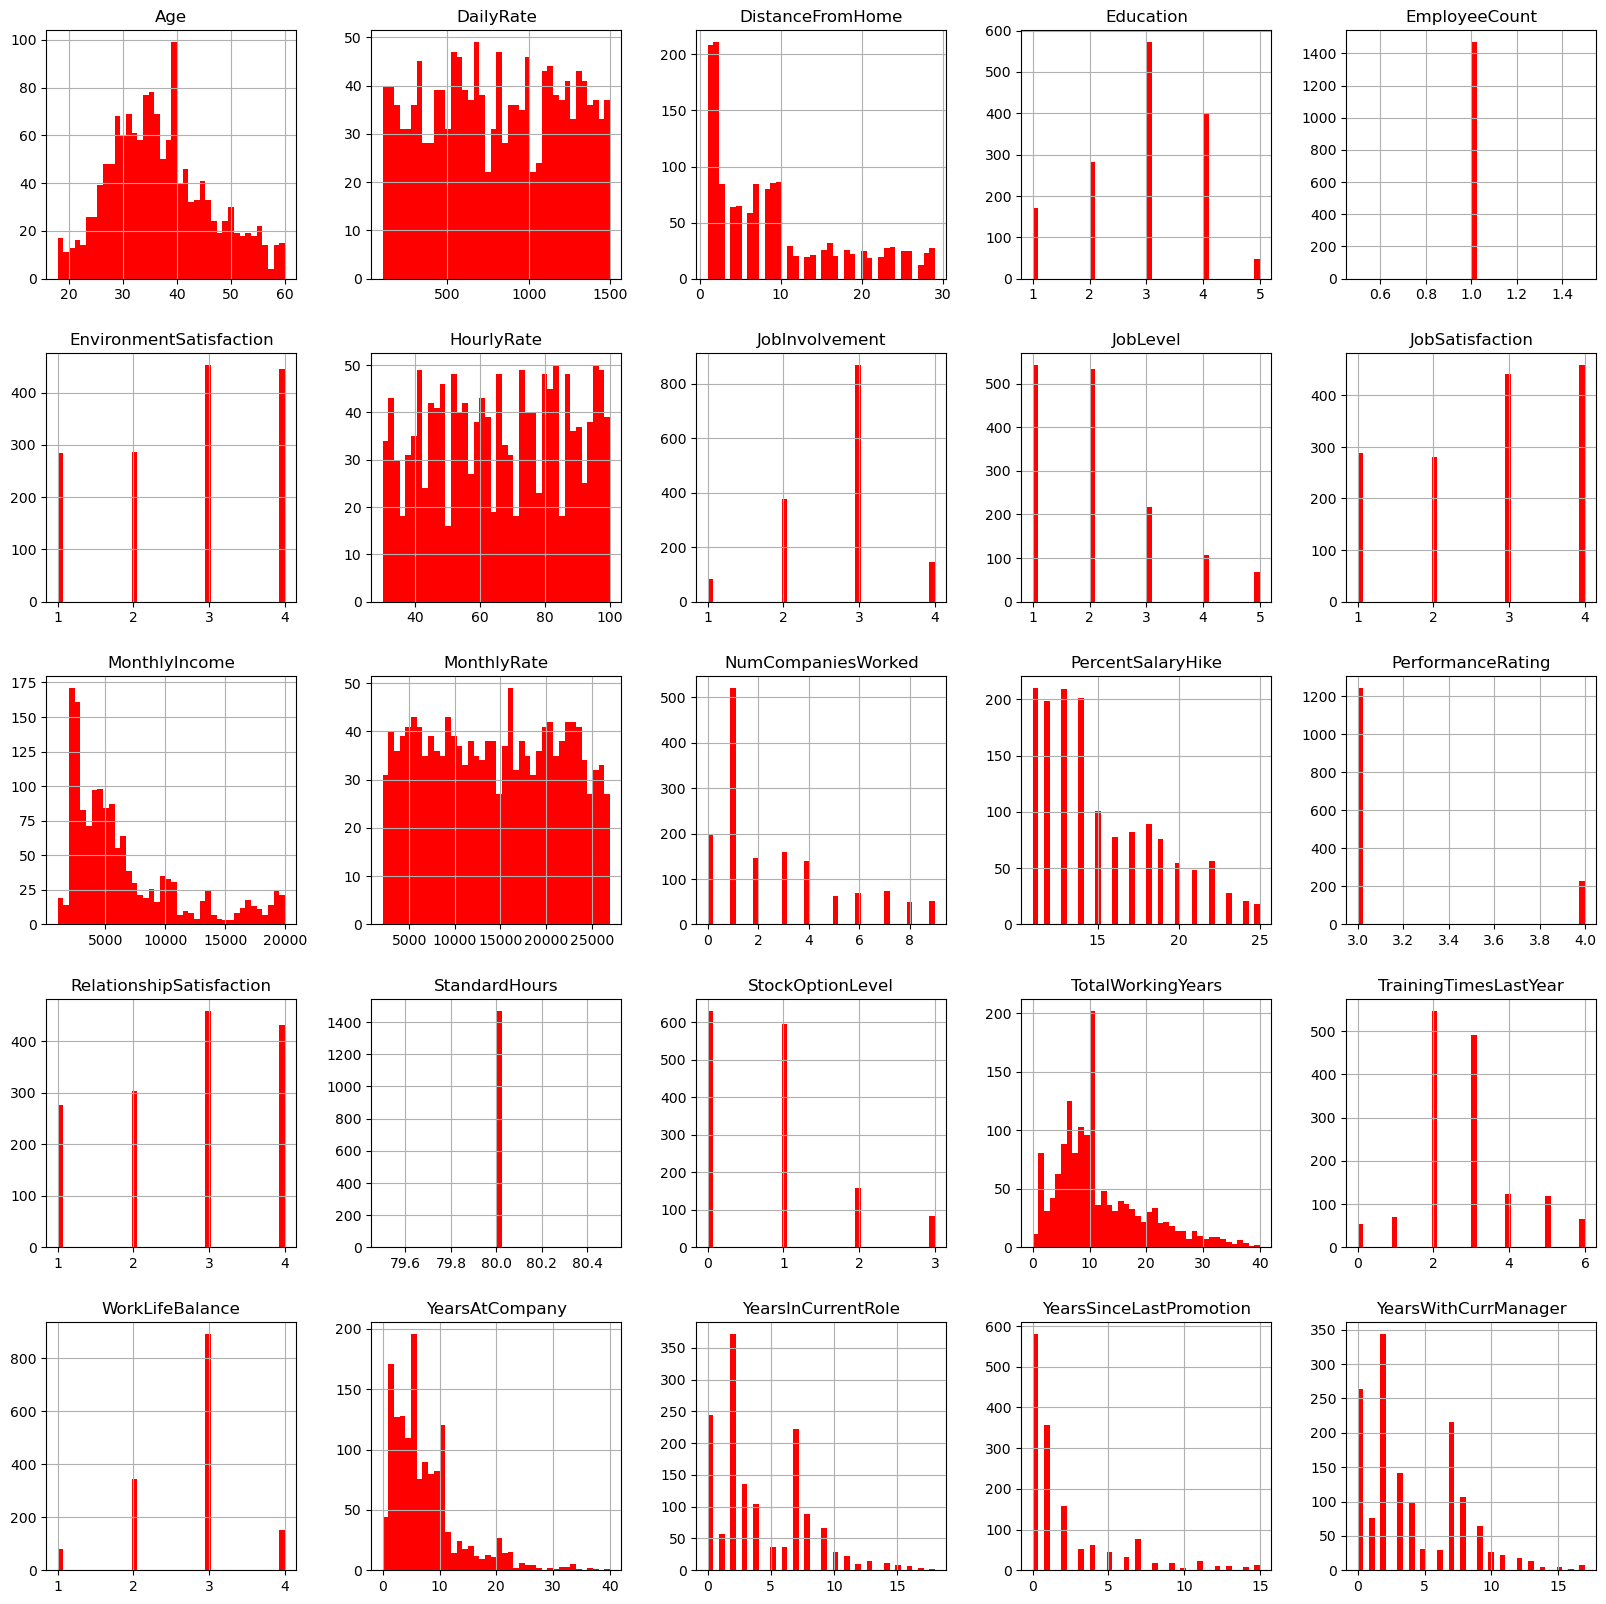

In [11]:
df.hist(bins=40,figsize=(20,20),color = 'red')
plt.show()

In [12]:
# Drop unnecessary columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df = df.reset_index(drop=True)
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [13]:
# Show categorical columns
sorted(list(set(df.columns.to_list()) - set(df._get_numeric_data().columns.to_list())))

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [14]:
# Encode categorical columns
# categorical_cols = list(set(df.columns.to_list()) - set(df._get_numeric_data().columns.to_list()))

# for col in categorical_cols:
#     mapping = dict()
#     values = sorted(df[col].unique())

#     for i in range(len(values)):
#         mapping[values[i]] = i

#     enc_map =[{'col': col, 'mapping': mapping}]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df = enc.fit_transform(df)

X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
X = pd.get_dummies(X)
df = pd.concat([X, y], axis=1)
df

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,False,False,True,False,False,False,True,False,True,Yes
1,49,279,8,1,3,61,2,2,2,5130,...,False,True,False,False,False,True,False,True,False,No
2,37,1373,2,2,4,92,2,1,3,2090,...,False,False,False,False,False,False,True,False,True,Yes
3,33,1392,3,4,4,56,3,1,3,2909,...,False,True,False,False,False,True,False,False,True,No
4,27,591,2,1,1,40,3,1,2,3468,...,False,False,False,False,False,True,False,True,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,False,False,False,False,False,True,False,True,False,No
1466,39,613,6,1,4,42,2,3,1,9991,...,False,False,False,False,False,True,False,True,False,No
1467,27,155,4,3,2,87,4,2,2,6142,...,False,False,False,False,False,True,False,False,True,No
1468,49,1023,2,3,4,63,2,2,2,5390,...,False,False,True,False,False,True,False,True,False,No


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   DailyRate                          1470 non-null   int64 
 2   DistanceFromHome                   1470 non-null   int64 
 3   Education                          1470 non-null   int64 
 4   EnvironmentSatisfaction            1470 non-null   int64 
 5   HourlyRate                         1470 non-null   int64 
 6   JobInvolvement                     1470 non-null   int64 
 7   JobLevel                           1470 non-null   int64 
 8   JobSatisfaction                    1470 non-null   int64 
 9   MonthlyIncome                      1470 non-null   int64 
 10  MonthlyRate                        1470 non-null   int64 
 11  NumCompaniesWorked                 1470 non-null   int64 
 12  Percen

In [16]:
# MinMax Scaling
df_cat = df.select_dtypes(include=['object', 'bool'])
df_numeric = df[list(set(df.columns.to_list()) - set(df_cat.columns.to_list()))]
df_numeric_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df_numeric), columns=df_numeric.columns)
df = pd.concat([df_numeric_scaled, df_cat], axis=1)
df

,DailyRate,Age,PercentSalaryHike,TotalWorkingYears,Education,YearsAtCompany,HourlyRate,JobLevel,TrainingTimesLastYear,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,0.715820,0.547619,0.000000,0.200,0.25,0.150,0.914286,0.25,0.000000,1.000000,...,False,False,True,False,False,False,True,False,True,Yes
1,0.126700,0.738095,0.857143,0.250,0.00,0.250,0.442857,0.25,0.500000,0.333333,...,False,True,False,False,False,True,False,True,False,No
2,0.909807,0.452381,0.285714,0.175,0.25,0.000,0.885714,0.00,0.500000,0.666667,...,False,False,False,False,False,False,True,False,True,Yes
3,0.923407,0.357143,0.000000,0.200,0.75,0.200,0.371429,0.00,0.500000,0.666667,...,False,True,False,False,False,True,False,False,True,No
4,0.350036,0.214286,0.071429,0.150,0.00,0.050,0.142857,0.00,0.500000,0.333333,...,False,False,False,False,False,True,False,True,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.559771,0.428571,0.428571,0.425,0.25,0.125,0.157143,0.25,0.500000,1.000000,...,False,False,False,False,False,True,False,True,False,No
1466,0.365784,0.500000,0.285714,0.225,0.00,0.175,0.171429,0.50,0.833333,0.000000,...,False,False,False,False,False,True,False,True,False,No
1467,0.037938,0.214286,0.642857,0.150,0.50,0.150,0.814286,0.25,0.000000,0.333333,...,False,False,False,False,False,True,False,False,True,No
1468,0.659270,0.738095,0.214286,0.425,0.50,0.225,0.471429,0.25,0.500000,0.333333,...,False,False,True,False,False,True,False,True,False,No


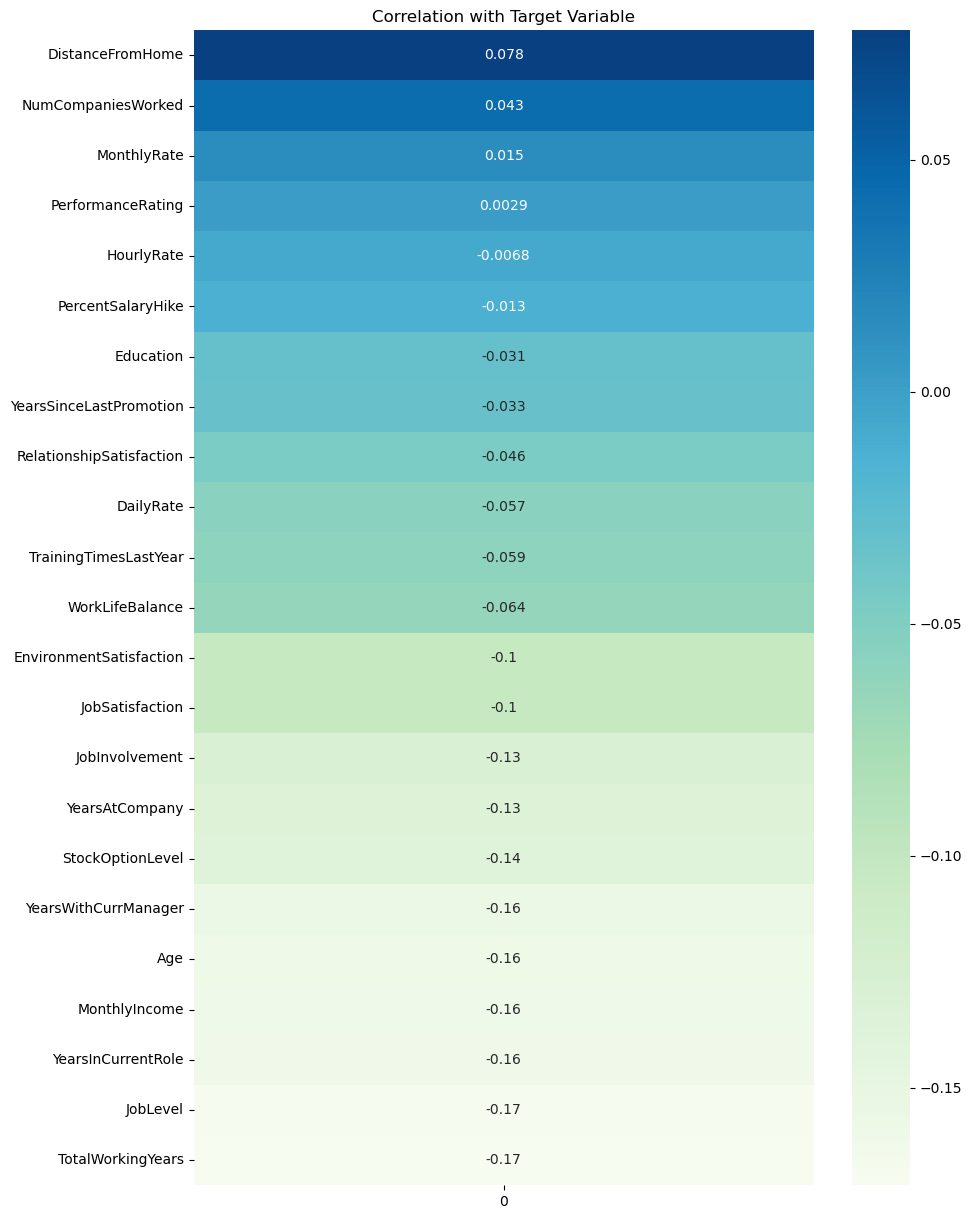

In [17]:
# Create a correlation matrix with target variable
y = df['Attrition'].apply(lambda x : 1 if x == 'Yes' else 0) 
corr_with_target = df_numeric_scaled.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 15))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

<Axes: >

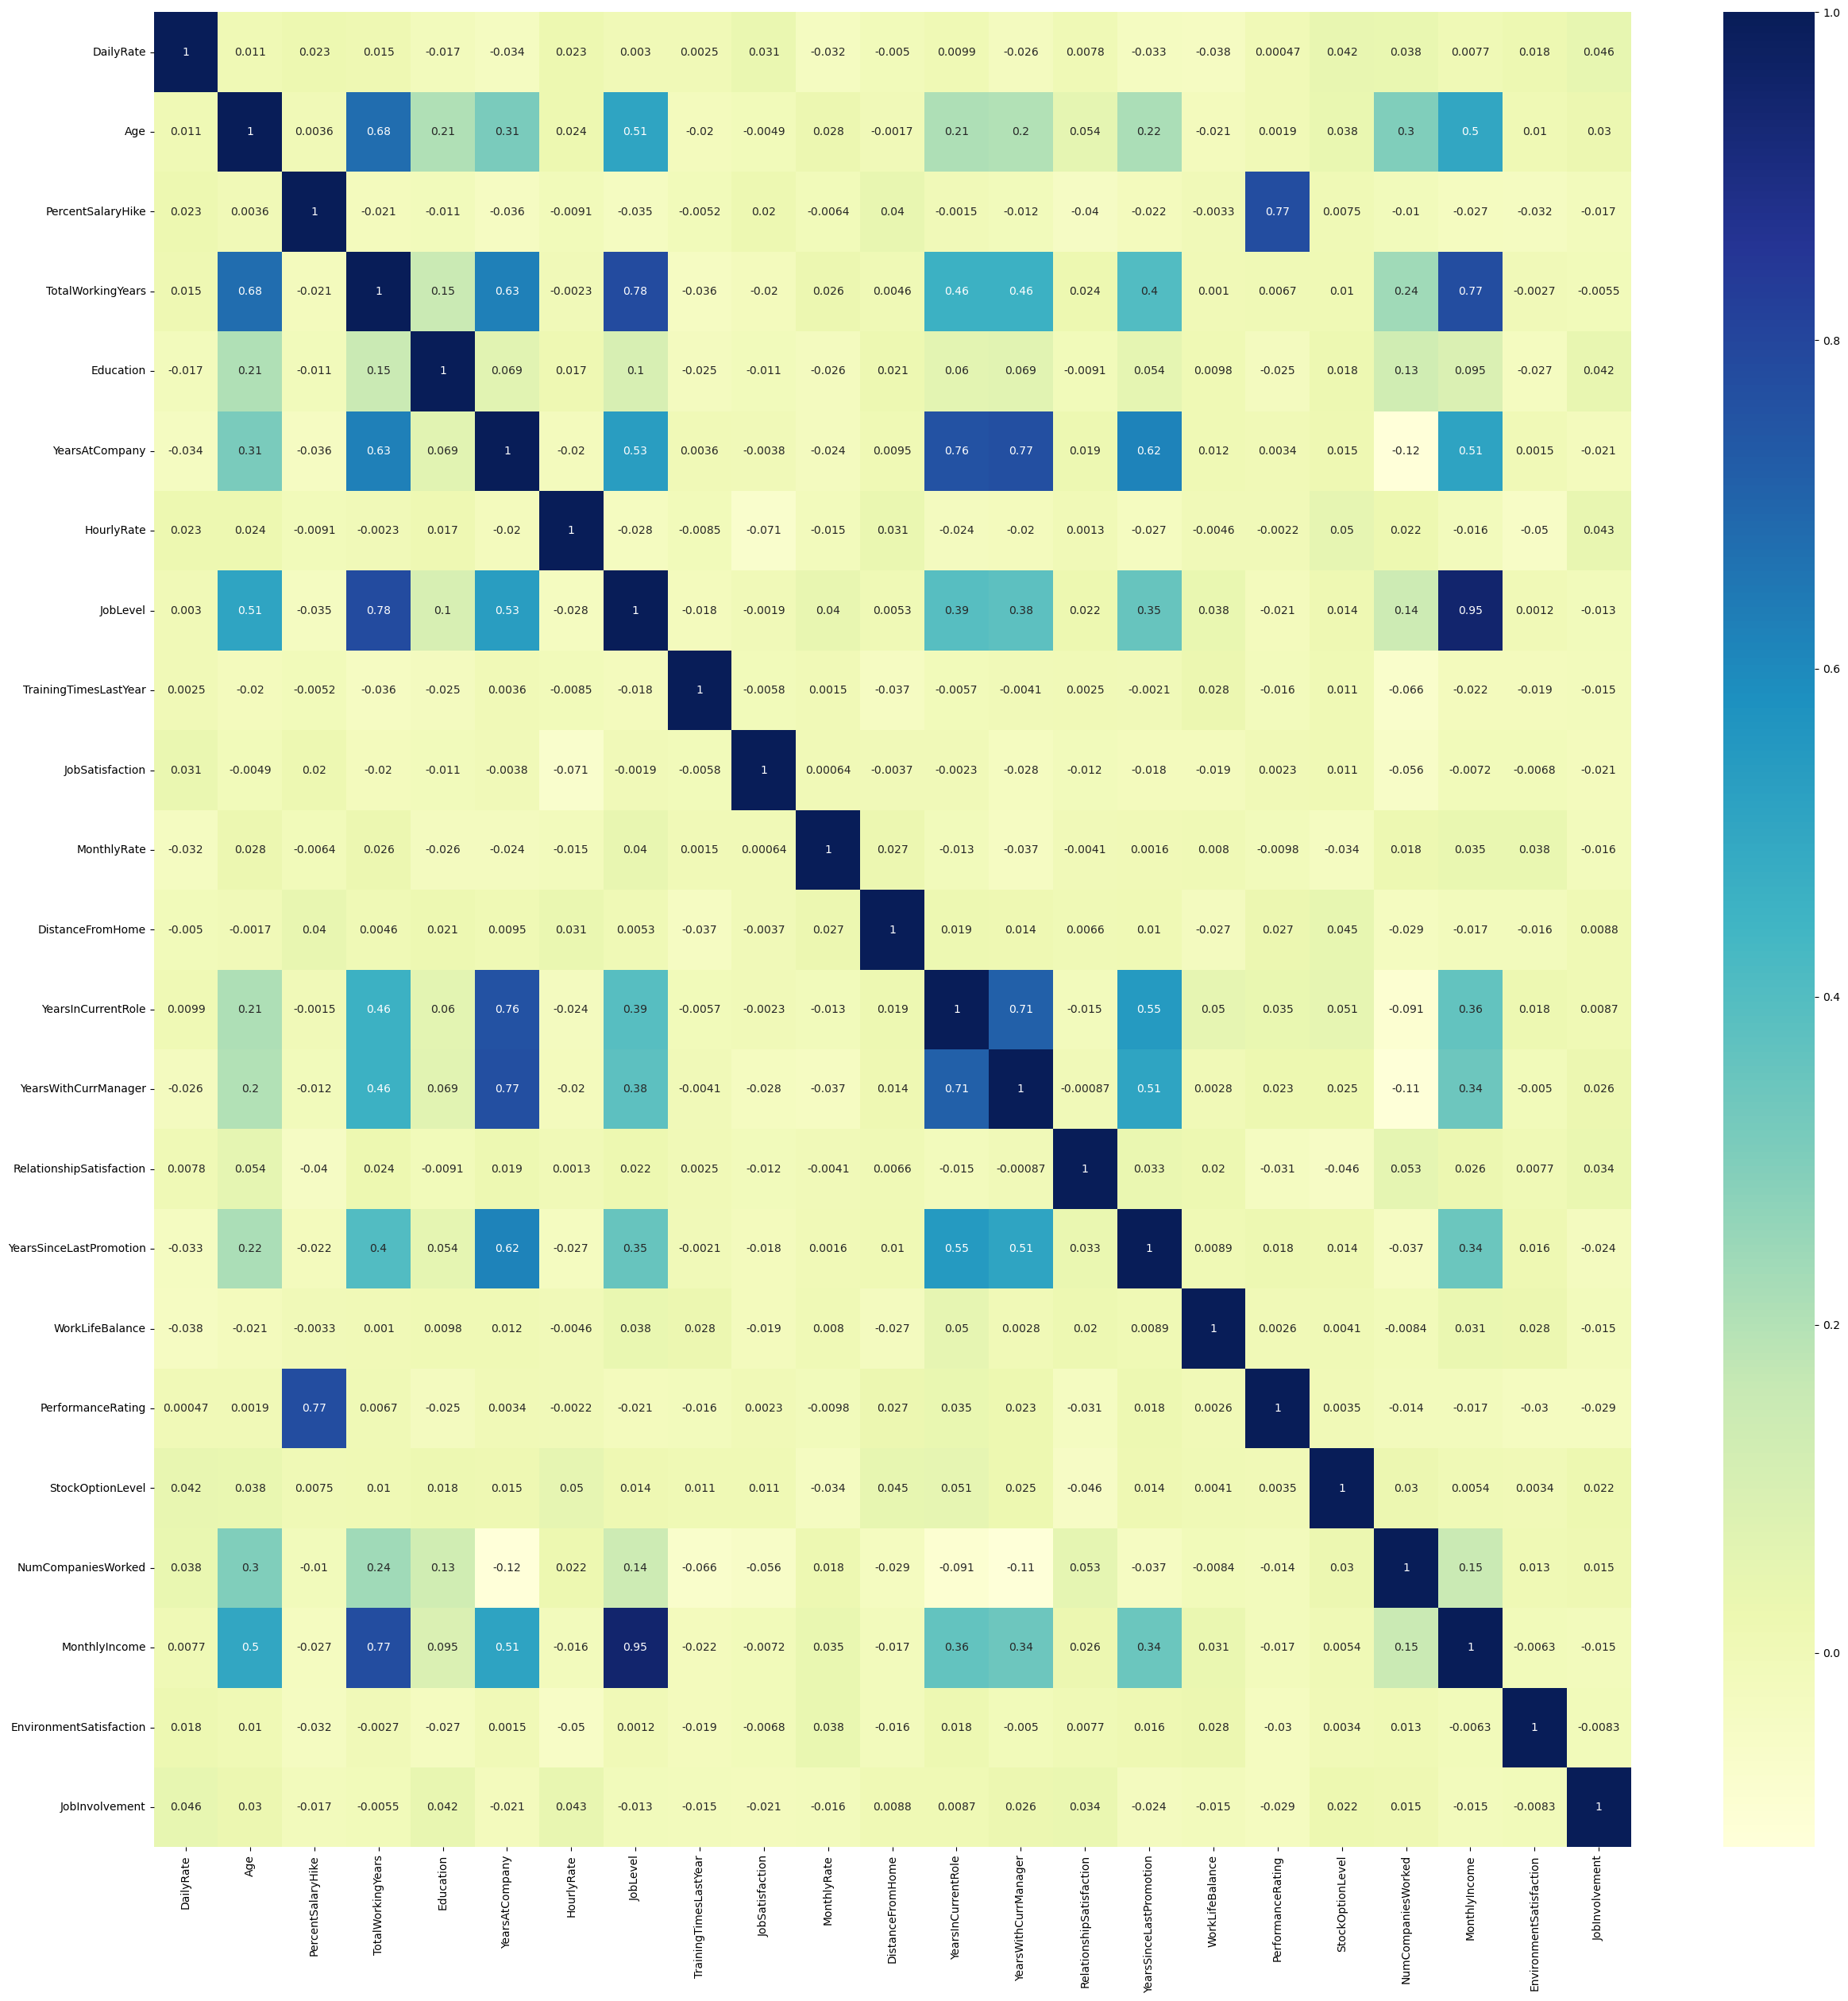

In [18]:
# Displaying heatmap
plt.subplots(figsize=(30,30))
# Plotting correlation heatmap
sns.heatmap(df_numeric_scaled.corr(method="pearson"), cmap="YlGnBu", annot=True)

# 3. Data Splitting

In [19]:
# Splitting the dataset into training and testing sets
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Logistic Regression

In [20]:
# Model training
model = LogisticRegression().fit(X_train, y_train)
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

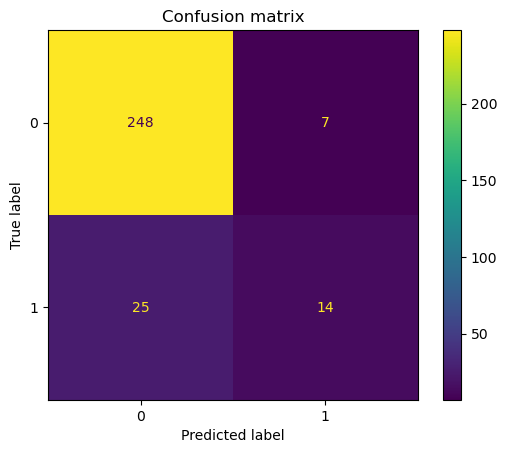

Accuracy Score: 0.891156462585034
              precision    recall  f1-score   support

          No       0.97      0.91      0.94       273
         Yes       0.36      0.67      0.47        21

    accuracy                           0.89       294
   macro avg       0.67      0.79      0.70       294
weighted avg       0.93      0.89      0.91       294



In [21]:
# Model evaluation

y_pred = model.predict(X_test)

# Function to plot the multilabel confusion matrix
def plot_multilabel_confusion_matrix(confusion_mtx, class_names):
    num_classes = confusion_mtx.shape[0]
    ncols = 2  # Set the number of columns for the plot
    nrows = (num_classes + ncols - 1) // ncols  # Calculate the number of rows needed

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for i in range(num_classes):
        ax = axes[i]
        ax.matshow(confusion_mtx[i], cmap=plt.cm.Blues, alpha=0.5)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(class_names[i])

        # Set x and y axis ticks to show "Positive" first and "Negative" second
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['Positive', 'Negative'])  # Positive first
        ax.set_yticks([0, 1])
        ax.set_yticklabels(['Positive', 'Negative'])  # Positive first

        # Show the counts
        for j in range(confusion_mtx[i].shape[0]):
            for k in range(confusion_mtx[i].shape[1]):
                ax.text(k, j, confusion_mtx[i][j, k], ha='center', va='center')

    # Hide any unused subplots
    for i in range(num_classes, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = multilabel_confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(len(y.unique()))])
    disp.plot()
    plt.title("Confusion matrix")
    plt.show()
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print(classification_report(y_pred,y_test))

evaluate_model(model, X_test, y_test)

# 5. Hyperparameter Tuning

To choose a solver, you might want to consider the following aspects:
- For small datasets, **liblinear** is a good choice, whereas **sag** and **saga** are faster for large ones

- For multiclass problems, all solvers except **liblinear** minimize the full multinomial loss

- **liblinear** can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrap it with the **OneVsRestClassifier**.

- **newton-cholesky** is a good choice for n_samples >> n_features * n_classes, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on n_features * n_classes because it explicitly computes the full Hessian matrix.

In [22]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
}

grid_search = GridSearchCV(model, param_grid=param_grid, verbose=True, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f"The best parameters: {grid_search.best_params_}")
best_nb_grid = grid_search.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_

The best parameters: {'C': 0.615848211066026, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3120 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/dhekmass/anaconda3/envs/data-science/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/dhekmass/anac

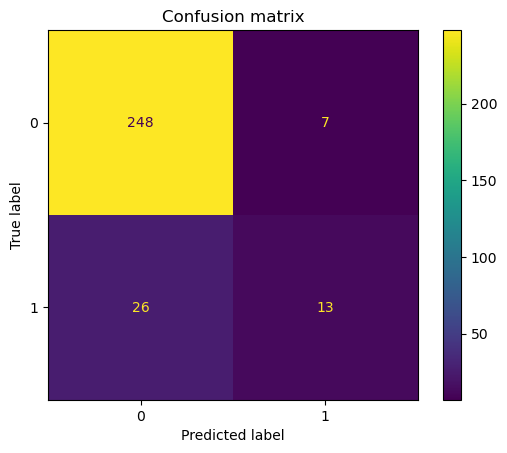

Accuracy Score: 0.8877551020408163
              precision    recall  f1-score   support

          No       0.97      0.91      0.94       274
         Yes       0.33      0.65      0.44        20

    accuracy                           0.89       294
   macro avg       0.65      0.78      0.69       294
weighted avg       0.93      0.89      0.90       294



In [23]:
# Evaluate the best model
evaluate_model(best_nb_grid, X_test, y_test)